In [2]:
import math
import cmath
from numpy.random import randint
from time import time
import matplotlib.pyplot as plt

In [18]:
def FFT(coeffs, roots):
    # need len(roots) to be a power of two
    # don't worry about this expression if you haven't seen it before 
    assert (len(roots) & (len(roots)-1) == 0) and len(roots) != 0
    if len(coeffs) == 0:
        return [0] * len(roots)
    if len(roots) == 1:
        return coeffs
    even = FFT(coeffs[::2], roots[::2])
    odd = FFT(coeffs[1::2], roots[::2])
    ret = [0]*len(roots)
    for i in range(len(roots)//2):
        ret[i] = even[i] + roots[i]*odd[i]
        ret[i + len(roots)//2] = even[i] - roots[i]*odd[i]
    return ret
        

In [19]:
expected = [6, -2+2j, 2, -2-2j]
actual = FFT([1, 2, 3], [1, 1j, -1, -1j])
print("expected: {}".format(expected))
print("actual: {}".format(actual))

expected: [6, (-2+2j), 2, (-2-2j)]
actual: [6, (-2+2j), 2, (-2-2j)]


In [20]:
not_expected = [6, 17, 34, 57]
actual = FFT([1, 2, 3], [1, 2, 3, 4])
print("NOT expected: {}".format(not_expected)) 
print("actual: {}".format(actual))

NOT expected: [6, 17, 34, 57]
actual: [6, 2, 2, -6]


In [21]:
def next_power_of_2(k): 
    ret = 1
    while ret < k: 
        ret *= 2
    return ret

In [22]:
def calc_nth_root(n):
    theta_n = 2 * math.pi / n
    a = math.cos(theta_n)
    b = math.sin(theta_n) 
    return a + b * 1j

In [23]:
def calc_all_nth_roots(n):
    root = calc_nth_root(n)
    return [root**k for k in range(n)]

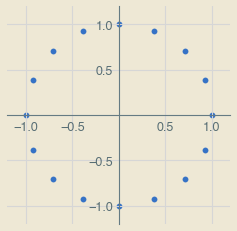

In [26]:
N = 16 # feel free to change this value and observe what happens 
roots = calc_all_nth_roots(N)
# Plot
f,ax = plt.subplots()
f.set_figwidth(4)
f.set_figheight(4)
plt.scatter([r.real for r in roots], [r.imag for r in roots]) 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
ax.set_xticks([-1, -0.5, 0.5, 1])
ax.set_yticks([-1, -0.5, 0.5, 1])
ax.xaxis.tick_bottom()
plt.show()

In [38]:
def poly_multiply(coeffs1, coeffs2):
    n = next_power_of_2(len(coeffs1) + len(coeffs2) - 1)
    roots = calc_all_nth_roots(n)
    fft1 = FFT(coeffs1, roots)
    fft2 = FFT(coeffs2, roots)
    unit_root = calc_nth_root(n)
    inv_roots = [unit_root**(-i) for i in range(n)]
    mul = [x*y for x, y in zip(fft1, fft2)]
    return [x/n for x in FFT(mul, inv_roots)]

In [39]:
def round_complex_to_int(lst):
    return [round(x.real) for x in lst]
def zero_pop(lst): 
    while lst[-1] == 0:
        lst.pop()

In [40]:
expected = [4, 13, 22, 15]
actual = round_complex_to_int(poly_multiply([1, 2, 3], [4, 5])) 
print("expected: {}".format(expected))
print("actual: {}".format(actual))

expected: [4, 13, 22, 15]
actual: [4, 13, 22, 15]


In [41]:
expected = [4, 13, 28, 27, 18, 0, 0, 0]
actual = round_complex_to_int(poly_multiply([1, 2, 3], [4, 5, 6])) 
print("expected: {}".format(expected))
print("actual: {}".format(actual))

expected: [4, 13, 28, 27, 18, 0, 0, 0]
actual: [4, 13, 28, 27, 18, 0, 0, 0]


In [43]:
def poly_multiply_naive(coeffs1, coeffs2): 
    n1, n2 = len(coeffs1), len(coeffs2)
    n = n1 + n2 - 1
    prod_coeffs = [0] * n
    for deg in range(n):
        for i in range(max(0, deg + 1 - n2), min(n1, deg + 1)):
            prod_coeffs[deg] += coeffs1[i] * coeffs2[deg - i] 
    return prod_coeffs


size: 1
FFT time: 0.000044
naive time: 0.000438
speed up: 9.983696

size: 10
FFT time: 0.000650
naive time: 0.000157
speed up: 0.241379

size: 100
FFT time: 0.007538
naive time: 0.003286
speed up: 0.435919

size: 1000
FFT time: 0.054280
naive time: 0.248230
speed up: 4.573140

size: 10000
FFT time: 0.637324
naive time: 27.684295
speed up: 43.438331


Text(0.5, 1.0, 'FFT Polynomial Multiplication Speedup')

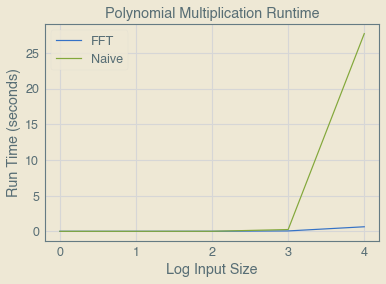

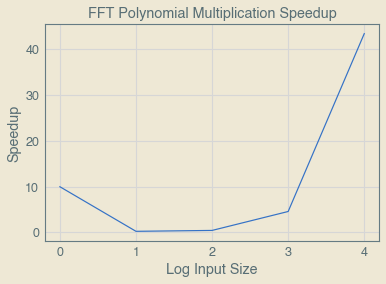

In [47]:
def rand_ints(lo, hi, length):
    ints = list(randint(lo, hi, length)) 
    ints = [int(x) for x in ints]
    return ints

def record(array, value, name): 
    array.append(value) 
    print("%s%f" % (name, value))
    
fft_times = []
naive_times = []
speed_ups = []
for i in range(5): 
    n = 10 ** i
    print("\nsize: %d" % n)
    poly1 = rand_ints(1, 100, n)
    poly2 = rand_ints(1, 100, n)
    time1 = time()
    fft_res = poly_multiply(poly1, poly2)
    fft_res = round_complex_to_int(fft_res) 
    zero_pop(fft_res)
    time2 = time()
    fft_time = time2 - time1
    record(fft_times, fft_time, "FFT time: ") 
    naive_res = poly_multiply_naive(poly1, poly2) 
    time3 = time()
    naive_time = time3 - time2
    record(naive_times, naive_time, "naive time: ") 
    assert fft_res == naive_res
    speed_up = naive_time / fft_time 
    record(speed_ups, speed_up, "speed up: ")
    
plt.plot(fft_times, label="FFT")
plt.plot(naive_times, label="Naive")
plt.xlabel("Log Input Size")
plt.ylabel("Run Time (seconds)")
plt.legend(loc="upper left")
plt.title("Polynomial Multiplication Runtime")

plt.figure()
plt.plot(speed_ups)
plt.xlabel("Log Input Size")
plt.ylabel("Speedup")
plt.title("FFT Polynomial Multiplication Speedup")